### Creazione grafo
nodi totali: 3110737 \
nodi che presentano l'anno: 3110687

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import re

#data = pd.read_csv("imdb-actors-actresses-movies.tsv", sep="\t")
data = pd.read_csv("prova.tsv", sep="\t")
#print(data)
edges_dict = data.to_dict("index")
print(edges_dict)
actors = data.get("Actor")
actors.drop_duplicates(inplace = True)
actors.reset_index(drop = True, inplace = True)
id_actor_dict = actors.to_dict()
#print(id_actor_dict)
actor_id_dict = {v: k for k ,v in id_actor_dict.items()}
movies = data.get("Movie")
movies.drop_duplicates(inplace = True)
movies.reset_index(drop = True, inplace = True)
movies.index += len(actors)
id_movie_dict = movies.to_dict()
#print(id_movie_dict)
movie_id_dict = {v: k for k, v in id_movie_dict.items()}

{0: {'Actor': 'Bryning, John', 'Movie': 'Rembrandt (1936)'}, 1: {'Actor': 'Bryning, John', 'Movie': 'The Amazing Dr. Clitterhouse (1947) (TV)'}, 2: {'Actor': 'Bryning, John', 'Movie': 'The Rose Without a Thorn (1947) (TV)'}, 3: {'Actor': 'Brynjarsson, Reynir Gar?ar', 'Movie': 'Hrafninn fl?gur (1984)'}, 4: {'Actor': 'Brynjarsson, Steinarr', 'Movie': 'Br?t?l M?rk (2013)'}, 5: {'Actor': 'Brynjolfsson, Ingvar', 'Movie': 'Nj?lssaga (2003) (TV)'}, 6: {'Actor': 'Brynjulfsen, Erik', 'Movie': 'Varg Veum - Bitre blomster (2007)'}, 7: {'Actor': 'Brynjulfsen, Jan Olav', 'Movie': 'S?lvmunn (1981)'}, 8: {'Actor': 'Brynjulfsen, Jan Olav', 'Movie': 'Rembrandt (1936)'}}


14
[('Bryning, John', {'id': 0, 'bipartite': 0}), ('Brynjarsson, Reynir Gar?ar', {'id': 1, 'bipartite': 0}), ('Brynjarsson, Steinarr', {'id': 2, 'bipartite': 0}), ('Brynjolfsson, Ingvar', {'id': 3, 'bipartite': 0}), ('Brynjulfsen, Erik', {'id': 4, 'bipartite': 0}), ('Brynjulfsen, Jan Olav', {'id': 5, 'bipartite': 0}), ('Rembrandt (1936)', {'id': 6, 'bipartite': 1, 'year': 1936}), ('The Amazing Dr. Clitterhouse (1947) (TV)', {'id': 7, 'bipartite': 1, 'year': 1947}), ('The Rose Without a Thorn (1947) (TV)', {'id': 8, 'bipartite': 1, 'year': 1947}), ('Hrafninn fl?gur (1984)', {'id': 9, 'bipartite': 1, 'year': 1984}), ('Br?t?l M?rk (2013)', {'id': 10, 'bipartite': 1, 'year': 2013}), ('Nj?lssaga (2003) (TV)', {'id': 11, 'bipartite': 1, 'year': 2003}), ('Varg Veum - Bitre blomster (2007)', {'id': 12, 'bipartite': 1, 'year': 2007}), ('S?lvmunn (1981)', {'id': 13, 'bipartite': 1, 'year': 1981})]
[('Bryning, John', 'Rembrandt (1936)', {}), ('Bryning, John', 'The Amazing Dr. Clitterhouse (1947) 

2

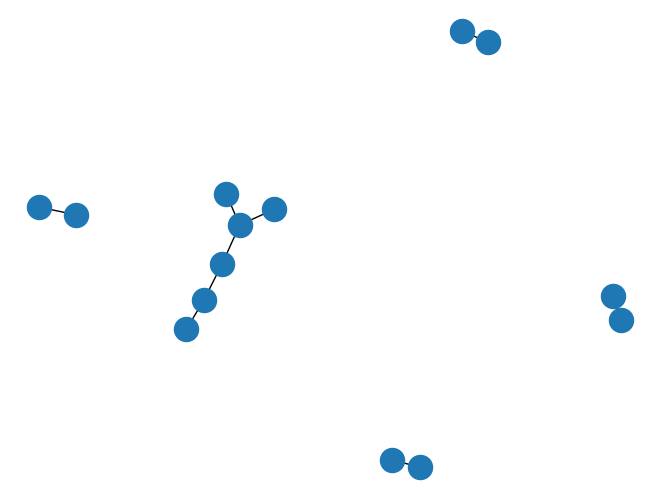

In [12]:
G = nx.Graph()
G.add_nodes_from([(a, {"id": id, "bipartite": 0}) for a, id in actor_id_dict.items()])
G.add_nodes_from([(m, {"id": id, "bipartite": 1, "year": int(re.search("(\(\d\d\d\d\))", m).group()[1:-1])}) for m, id in movie_id_dict.items() if re.search("(\(\d\d\d\d\))", m)!=None])
G.add_edges_from([(v["Actor"], v["Movie"]) for k, v in edges_dict.items() if v["Actor"] in G.nodes and v["Movie"] in G.nodes])

#controllo il numero di nodi totali creati
sum = 0
for i in G.nodes:
    sum += 1
print(sum)

print(G.nodes.data())
print(G.edges.data())
nx.draw(G)
print(list(G.nodes)[0])
print(list(G.nodes)[5])
nx.shortest_path_length(G, list(G.nodes)[0], list(G.nodes)[5])

### Es 3.I

In [ ]:
for a in G.nodes().data():
    print(a[1]["bipartite"])


In [30]:
for n in G.adj[id_actor_dict[0]]:
    print(n)

Rembrandt (1936)
The Amazing Dr. Clitterhouse (1947) (TV)
The Rose Without a Thorn (1947) (TV)


In [37]:
def maxCollab(G):
    collaborations = {}
    c = 0
    for a in G.nodes().data():
        if a[1]["bipartite"] == 0:
            for n in G.adj[a[0]]:
                c += (len(G.adj[n])-1)
            collaborations.update({a[0]: c})
    m = max(list(collaborations.values()))
    print(m)
    print([k for k, v in collaborations.items() if v == m][0])
    
maxCollab(G)

224140834
??r?lfsd?ttir, Krist?n


### Es 4

In [ ]:
for a1 in G.nodes():
    print(a1)

In [56]:
A = nx.Graph()
A.add_nodes_from([(a, {"id": id}) for a, id in actor_id_dict.items()])
#A.add_nodes_from([a for a in G.nodes().data() if a[1]["bipartite"] == 0])
#A.add_edges_from([(a1, a2) for a1 in A.nodes() for m in G.adj[a1] for a2 in G.adj[m]])

#print(A.nodes.data())
#print(A.edges.data())
#nx.draw(A)

In [50]:
it = iter(edges_dict.items())
print(next(it))

(0, {'Actor': 'Bryning, John', 'Movie': 'Rembrandt (1936)'})


In [53]:
for k1, v1 in edges_dict.copy().items():
    for k2, v2 in edges_dict.copy().items():
        if v2["Movie"] == v1["Movie"] and v1["Actor"] != v2["Actor"]:
            A.add_edge(v1["Actor"], v2["Actor"])
            edges_dict.pop(k2)
    edges_dict.pop(k1)

    #A.add_edges_from([(v1["Actor"], v2["Actor"]) for k2, v2 in edges_dict.items() if v1["Actor"] != v2["Actor"] and v2["Movie"] == v1["Movie"]])

print(A.nodes.data())
print(A.edges.data())

[('Bryning, John', {'id': 0}), ('Brynjarsson, Reynir Gar?ar', {'id': 1}), ('Brynjarsson, Steinarr', {'id': 2}), ('Brynjolfsson, Ingvar', {'id': 3}), ('Brynjulfsen, Erik', {'id': 4}), ('Brynjulfsen, Jan Olav', {'id': 5})]
[('Bryning, John', 'Brynjulfsen, Jan Olav', {})]


In [60]:
for i in A.nodes:
    for j in A.nodes:
        try:
            if nx.shortest_path_length(G, i, j) == 2:
                A.add_edge(i, j)
        except:
            pass
    #A.add_edges_from([(i, j) for j in A.nodes if nx.shortest_path_length(G, i, j) == 2])

print(A.nodes.data())
print(A.edges.data())

[('Bryning, John', {'id': 0}), ('Brynjarsson, Reynir Gar?ar', {'id': 1}), ('Brynjarsson, Steinarr', {'id': 2}), ('Brynjolfsson, Ingvar', {'id': 3}), ('Brynjulfsen, Erik', {'id': 4}), ('Brynjulfsen, Jan Olav', {'id': 5})]
[('Bryning, John', 'Brynjulfsen, Jan Olav', {})]


### celle per prove

In [10]:
diz = {0: "a 1900 (2000)", 1: "b (2004)"}
x = re.search("(\(\d\d\d\d\))", diz[0]).group()
print(int(x[1:-1]))


2000


In [38]:
print(id_actor_dict[0])
print(actor_id_dict[id_actor_dict[0]])

Bryning, John
0


### file luca
esegue in circa 1 min

In [65]:
""" G = nx.Graph()
f = open("imdb-actors-actresses-movies.tsv")
i = 0
actors_dict = {}
movies_dict = {}
r_dictionary = {}

for line in f:
    x = re.compile('(.+)\t(.+(?<=\()(\d\d\d\d)(?=[/IXV]*\)).*)')
    matched_line = x.match(line)
    if matched_line:
        actor = matched_line.group(1)
        movie = matched_line.group(2)
        year = int(matched_line.group(3))
        G.add_node(actor, id=i, type='actor')
        G.add_node(movie, id=i + 1, type='movie', year=year)
        G.add_edge(actor, movie)
        actors_dict.update({actor: i})
        movies_dict.update({movie: i + 1})
    i += 2

f.close()
n_actors = 0
n_movie = 0
for node in G.nodes(data=True):
    if node[1]['type'] == 'actor':
        n_actors += 1
    else:
        n_movie += 1
print('actors: ', n_actors)
print('movie: ', n_movie) """

" n_actors = 0\nn_movie = 0\nfor node in G.nodes(data=True):\n    if node[1]['type'] == 'actor':\n        n_actors += 1\n    else:\n        n_movie += 1\nprint('actors: ', n_actors)\nprint('movie: ', n_movie) "